<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<br>
<strong>Για το εργαστήριο του μαθήματος "<i>Στοχαστικές Διεργασίες & Βελτιστοποίηση στη Μηχανική Μάθηση</i>" έχουμε προσαρμόσει το κείμενο και τον κώδικα από το παραπάνω βιβλίο στις ανάγκες μας.</strong>

<b>Τρέξτε το Notebook και απαντήστε, <u>συνοπτικά</u>, στις ερωτήσεις.</b>

<h2><b><i>Support Vector Machines</i></b></h2>

Αρχικά, θα φορτώσουμε τις βιβλιοθήκες που είναι απαραίτητες για την άσκηση. Όλες οι βιβλιοθήκες είναι εγκατεστημένες στο Colab.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets.samples_generator import make_circles
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

C:\Users\Marios Michailidis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Το παρακάτω τμήμα κώδικα δημιουργεί και εμφανίζει δείγματα από 2 clusters με μία δεδομένη τυπική απόκλιση.

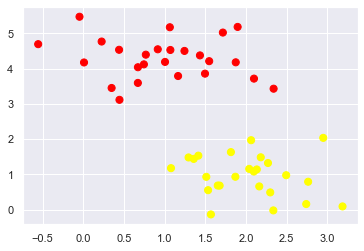

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Γίνεται εύκολα αντιληπτό ότι οι δύο κατηγορίες μπορούν να διαχωριστούν με ευθείες γραμμές. Στο παρακάτω σχήμα φαίνονται 3 τέτοιες ενδεικτικές γραμμές. 
<ul>
<li><b>Ερώτηση 1:</b> Σε ποια κατηγορία θα ανήκει το test example που φαίνεται στην παρακάτω με εικόνα με το σύμβολο 'Χ' ανάλογα με την ευθεία γραμμή που θα επιλεχθεί; </li>
<li><b>Ερώτηση 2:</b> Γιατί αυτή η μέθοδος διαχωρισμού των κλάσεων ενός ταξινομητή μπορεί να οδηγήσει σε μη επιθυμητά αποτελέσματα;</li>
</ul>

- Θεωρώντας τις ευθείες (ε1), (ε2), (ε3) κινούμενοι δεξιόστροφα, το σημείο "Χ" θα κατηγοριοποιούνταν στην κόκκινη, κόκκινη και κίτρινη κλάση, αντίστοιχα. Το βασικό πρόβλημα που προκύπτει από νωρίς, σε αυτή την περίπτωση, είναι ότι ανάλογα με την ευθεία διαχωρισμού (υπάρχουν άπειρες διαφορετικές ευθείες διαχωρισμού) σημεία του test set θα ταξινομούνται σε διαφορετικές κλάσεις κάθε φορά.

- Όπωως επισημάνθηκε και στο παραπάνω ερώτημα, διαφορετικές γραμμές διαχωρισμού μεταξύ των δύο κλάσεων, που τις διαχωριζούν τέλεια μεταξύ τους, αναμένεται να κατηγοριοποιούν ορισμένα samples του test set διαφορετικά, ανάλογα με την περίπτωση. Διαφαίνεται επομένως ότι ο προσδιορισμός απλώς μιας γραμμής/επιπέδου διαχωρισμού μεταξύ δύο γραμμικά διαχωρίσιμων κλάσεων δεν επαρκεί, μιάς και εντοπίζονται ορισμένες "παθολογικές" περιπτώσεις, γεγονός που μας οδηγεί στην εύρεση πιο προχωρημένων μεθόδων. Την λύση σε αυτή την περίπτωση δίνουν τα Support Vector Machines (SVM), με βάση τα οποία προσδιορίζεται μία γραμμή/επίπεδο διαχωρισμού με περιθώρια, όπως παρουσιάζεται και παρακάτω.

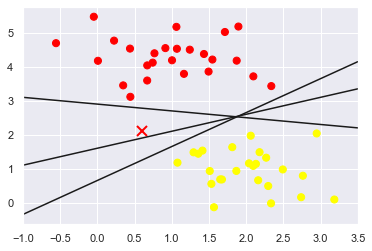

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Στην περίπτωση του ταξινομητή SVM το πρόβλημα αυτό επιλύεται με τον παρακάτω τρόπο: Αντί να τραβήξουμε μία γραμμή μηδενικού πλάτους ανάμεσα στις δύο κλάσεις, τραβάμε μία γραμμή με περιθώρια (margins) στις δύο πλευρές της. Η μέθοδος αυτή για τις γραμμές του προηγούμενου προβλήματος φαίνεται στην παρακάτω εικόνα. 
<ul>
<li><b>Ερώτηση 3:</b> Ποιος περιορισμός ισχύει για τα περιθώρια της εκάστοτε γραμμής;</li>
<li><b>Ερώτηση 4:</b> Με ποιο κριτήριο επιλέγεται η καλύτερη γραμμή;</li>
</ul>

- Πρέπει τα περιθώρια της γραμμής να διέρχονται από ένα ή περισσότερα στοιχεία της κάθε κλάσης.
- Ως καλύτερη γραμμή επιλέγεται αυτή που έχει ίσα περιθώρια ως προς τις δύο κλάσεις.

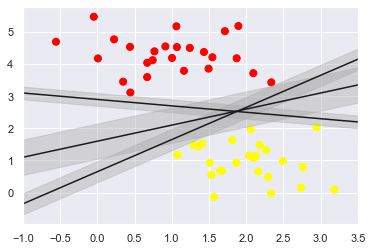

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Εκπαίδευση του Μοντέλου

Χρησιμοποιώντας το πακέτο Scikit-Learn θα εκπαιδεύσουμε τον αλγόριθμο SVM πάνω στα δεδομένα του προηγούμενου προβλήματος, χρησιμοποιώντας γραμμικό πυρήνα.

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Με την παρακάτω μέθοδο θα εμφανιστεί στο σχήμα που ακολουθεί η βέλτιστη γραμμή διαχωρισμού των δύο κατηγοριών, καθώς και τα περιθώριά της. Τα training examples που ακουμπούν πάνω στα όρια ονομάζονται Support Vectors.

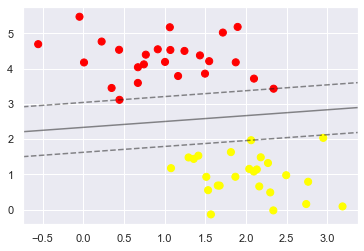

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Στο ακόλουθο σχήμα, η διαδικασία επαναλαμβάνεται για δύο datasets που περιλαμβάνουν 60 και 120 training examples αντίστοιχα. 
<ul>
<li><b>Ερώτηση 5:</b> Τι παρατηρείτε σχετικά με τη βέλτιστη γραμμή που διαχωρίζει τις δύο κατηγορίες και τα περιθώριά της;</li>
<li><b>Ερώτηση 6:</b>Τι αρκεί να κάνει ο αλγόριθμος για να ταξινομήσει νέα δεδομένα που θα λάβει στην είσοδό του;</li>
</ul>

- Παρατηρούμε ότι μόνο ορισμένα από τα σημεία της κάθε κλάσης απέχουν από την ευθεία διαχωρισμού απόσταση ακριβώς ίση με το μέγιστο περιθώριο. Συνεπώς, αυτά και μόνο θα αρκούσαν για να την ανακαλύψουμε.

- Προκειμένου τα ταξινομηθούν τα samples του test set, χρησιμοποιώντας το SVM μοντέλο, έπειτα από την φάση εκπαίδευσής του (δηλαδή προσδιορισμού του βέλτιστου διανύσματος βαρών της ευθείας/επιπέδου διαχωρισμού $\textbf{w}^*$), ποιοτικά ελέγχεται από ποια πλευρά της ευθείας διαχωρισμού βρίσκεται το εκάστοτε sample. Συνεπώς, εάν ${\textbf{w}^{*}}^{T} \textbf{x} + w_0 > 0$ τοτε το συγκεκριμένο δείγμα $\textbf{x}$ κατατάσεται στην κόκκινη κλάση, διαφορετικά στην κίτρινη.

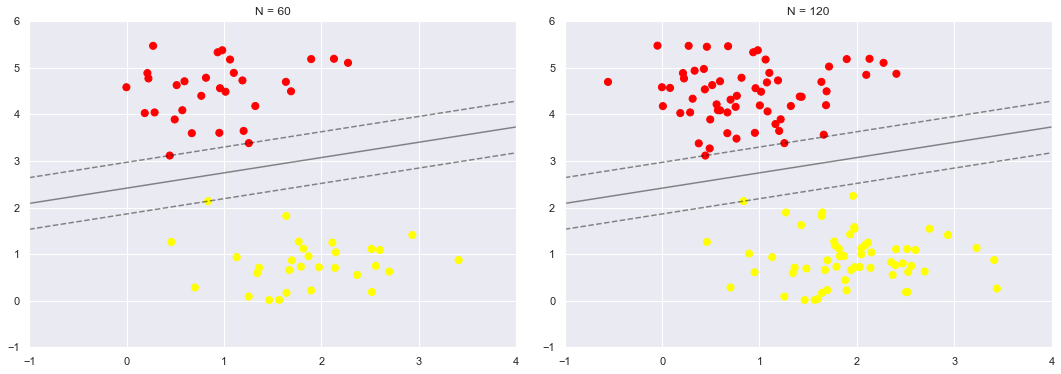

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Μη Γραμμικά Διαχωρίσιμες Κατηγορίες: Kernel SVM

Στην περίπτωση που οι κατηγορίες του προβλήματος δεν είναι γραμμικά διαχωρίσιμες, ο αλγόριθμος SVM χρησιμοποιεί μη γραμμικούς πυρήνες (kernels) για να προβάλει τα δεδομένα εκπαίδευσης σε μεγαλύτερη διάσταση όπου μπορεί να τα καταστήσει γραμμικά διαχωρίσιμα. Μία τέτοια περίπτωση δεδομένων εκπαίδευσης παρουσιάζεται στο επόμενο σχήμα.

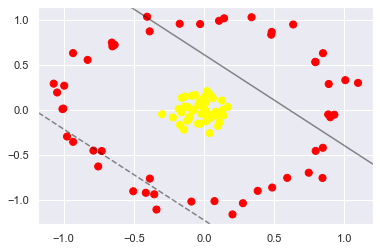

In [8]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Είναι φανερό ότι τα δεδομένα εκπαίδευσης δεν μπορούν να διαχωριστούν γραμμικά. Στο επόμενο σχήμα φαίνεται η προβολή τους στις τρεις διαστάσεις με τη χρήση ενός μη γραμμικού πυρήνα. 
<ul>
<li><b>Ερώτηση 7:</b> Τι είδους πυρήνας χρησιμοποιήθηκε;</li>
<li><b>Ερώτηση 8:</b> Δώστε ένα παράδειγμα γραμμικού ορίου που θα μπορούσε να διαχωρίσει τις δύο κατηγορίες.</li>
</ul>

- Σύμφωνα με την μορφή του r, χρησιμοποιήθηκε Gaussian Kernel.

- Έπειτα από την εφαρμογή του Gaussian Kernel οι δύο κλάσεις είναι πια γραμμικά διαχωρίσιμες. Για παραράδειγμα θα μπορούσαν να διαχωριστούν πλήρως με ένα υπερεπίπεδο παράλληλο στο επίπεδο x-y στο κατάλληλο ύψος, όπως για παράδειγμα z = 0.5.

In [9]:
r = np.exp(-(X ** 2).sum(1))

In [10]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

Η εύρεση του πυρήνα που μπορεί να διαχωρίσει με τον καλύτερο τρόπο τα δεδομένα απαιτεί, συνήθως, πολλούς υπολογισμούς. 
<ul>
<li><b>Ερώτηση 9:</b> Ποια μέθοδος μπορεί να βοηθήσει σε αυτό και πώς; (hint: <a href="https://en.wikipedia.org/wiki/Kernel_trick">Kernel Trick</a>)</li>
</ul>

Παρακάτω γίνεται η εκπαίδευση του αλγορίθμου SVM με μη γραμμικό πυρήνα.

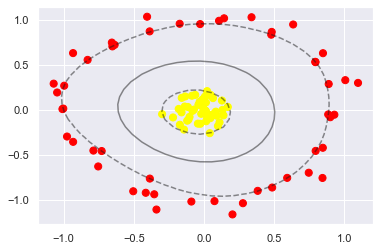

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Είναι γνώστο ότι η εύρεση του πυρήνα που διαχωρίζει τα δεδομένα με τον καλύτερο δυνατό τρόπο, η απεικόνιση των samples σε χώρους υψηλότερης διάστασης καθώς οι υπολογισμοί σε χώρους με τόσο μεγάλη διάσταση, ενδεχομένως να συνδέονται με υψηλό υπολογιστικό κόστος. Με την βοήθεια του Kernel Trick επιτυγχάνεται οι υπολογισμοί στους χώρους μεγαλύτερης διάστασης να ανάγονται σε υπολογισμούς στον αρχικό χώρο μικρότερης διάστασης. Κάτι τέτοιο πραγματοποιείται με την επιλογή συγκεκριμένων πυρύνων, έστω $\boldsymbol{\phi}(\cdot)$ ώστε να ισχύει $K(\textbf{x}, \textbf{y}) = <\boldsymbol{\phi}(\textbf{x}), \boldsymbol{\phi}(\textbf{y})>$, πράγμα που σηματοδοτεί ότι το εσωτερικό γινόμενο στον χώρο υψηλότερης διάστασης (έπειτα από την εφαρμογή του μή γραμμικού kernel $\boldsymbol{\phi}$, ανάγεται στον υπολογισμό της τιμής μίας συνάρτησης K στον αρχικό χώρο. Κάτι τέτοιο μειώνει δραστικά το υφιστάμενο αρχικό υπολογιστικό κόστος που θα αναμέναμε.   